In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [115]:
# you can use the command below to check packages available and their respective versions
#!pip list

In [116]:
ice_screen_df = pd.read_csv('tania/datasets/IceCreamData.csv')
ice_screen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [117]:
ice_screen_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [118]:
ice_screen_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


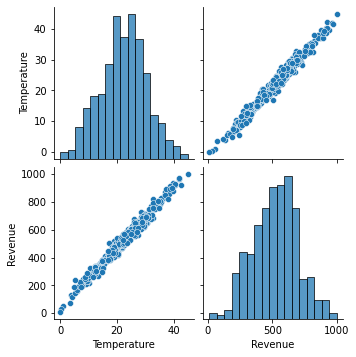

In [119]:
# there is a positive correlation between temperature and revenue
sns.pairplot(ice_screen_df)

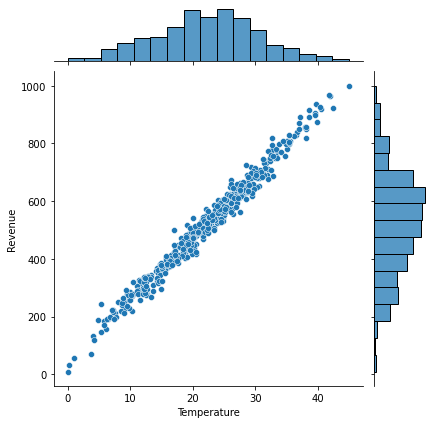

In [138]:
sns.jointplot(x='Temperature', y='Revenue', data=ice_screen_df)

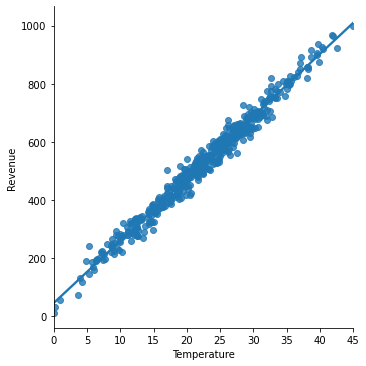

In [140]:
sns.lmplot(x='Temperature', y='Revenue', data=ice_screen_df)

Text(0.5, 0.98, 'Revenue Histogram')

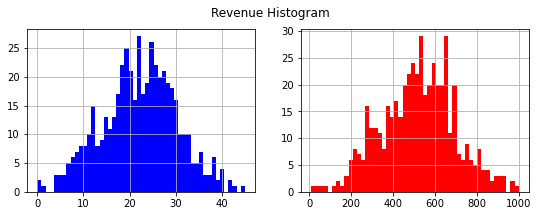

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ice_screen_df['Temperature'].hist(ax=ax1, bins=50, figsize=[9,3], color='b')
fig.suptitle('Temperature Histogram')
ice_screen_df['Revenue'].hist(ax=ax2, bins=50, figsize=[9,3], color='r')
fig.suptitle('Revenue Histogram')

<AxesSubplot:>

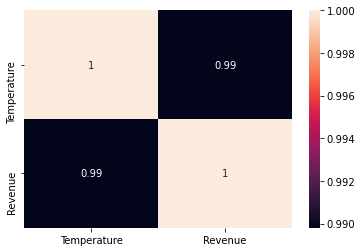

In [121]:
sns.heatmap(ice_screen_df.corr(), annot=True)

In [122]:
x = ice_screen_df[['Temperature']]
y = ice_screen_df[['Revenue']]

In [123]:
# Convert the datatype to float32
x = np.array(x).astype('float32')
y = np.array(y).astype('float32')

In [124]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [125]:
x_train.shape

(400, 1)

In [126]:
x_test.shape

(100, 1)

In [127]:
y_train.shape

(400, 1)

In [128]:
y_test.shape

(100, 1)

In [129]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Build the model using the train data
# if you set fit_intercept = False, so b coefficient (intercept) will be zero
regression_model_sklearn = LinearRegression(fit_intercept = True)
regression_model_sklearn.fit(x_train, y_train)

LinearRegression()

In [130]:
# Return the coefficient of determination of the prediction (R²). 
# The coefficient of determination (R²) is a number between 0 and 1 that measures how well a statistical model predicts an outcome
# It show show % of variation in y is explained by the variation in x.
# check the model accuracy using the test data
regression_model_sklearn_accuracy = regression_model_sklearn.score(x_test, y_test)
regression_model_sklearn_accuracy

0.9807948723837738

In [131]:
print('Linear Model Coefficient (m): ', regression_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regression_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[21.47491]]
Linear Model Coefficient (b):  [43.817078]


In [132]:
# predicting using the test data
y_predict = regression_model_sklearn.predict(x_test)
y_predict

array([[ 652.31647],
       [ 360.34763],
       [ 819.417  ],
       [ 537.81494],
       [ 622.71027],
       [ 509.90753],
       [ 757.5502 ],
       [ 912.9924 ],
       [ 863.8408 ],
       [ 472.9474 ],
       [ 550.1335 ],
       [ 679.24854],
       [ 748.3022 ],
       [ 546.5995 ],
       [ 352.714  ],
       [ 571.7973 ],
       [ 800.1041 ],
       [ 530.29114],
       [ 746.39844],
       [ 570.572  ],
       [ 673.14014],
       [ 236.91432],
       [ 414.52087],
       [ 645.09784],
       [ 309.07693],
       [ 892.9331 ],
       [ 313.7892 ],
       [ 521.6068 ],
       [ 719.6588 ],
       [ 474.39304],
       [ 797.4747 ],
       [ 390.5472 ],
       [ 764.3308 ],
       [ 468.48663],
       [ 671.7811 ],
       [ 260.6416 ],
       [ 604.78766],
       [ 497.8836 ],
       [ 642.6903 ],
       [ 944.1408 ],
       [ 696.81793],
       [ 493.38593],
       [ 184.31699],
       [ 292.82086],
       [ 564.3769 ],
       [ 599.2859 ],
       [ 804.98553],
       [ 364.

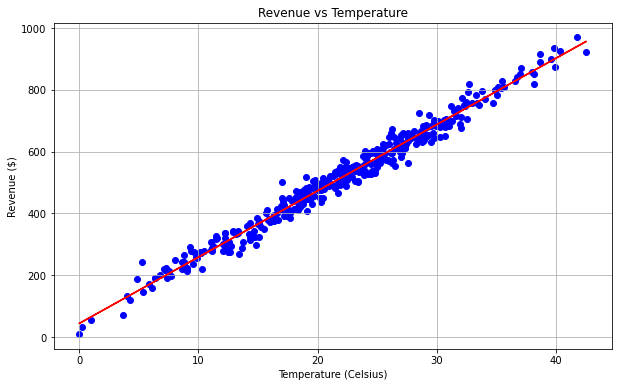

In [133]:
# evaluating the model performance
plt.figure(figsize = (10, 6))
plt.scatter(x_train, y_train, color = 'b')
plt.plot(x_train, regression_model_sklearn.predict(x_train), color = 'red')
plt.ylabel('Revenue ($)')
plt.xlabel('Temperature (Celsius)')
plt.title('Revenue vs Temperature')
plt.grid()

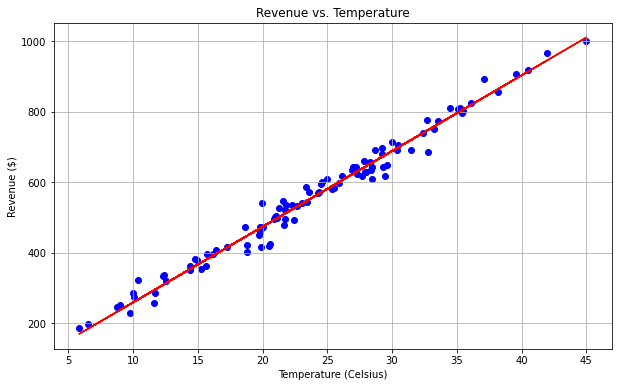

In [134]:
plt.figure(figsize = (10, 6))
plt.scatter(x_test, y_test, color = 'b')
plt.plot(x_test, regression_model_sklearn.predict(x_test), color = 'red')
plt.ylabel('Revenue ($)')
plt.xlabel('Temperature (Celsius)')
plt.title('Revenue vs. Temperature')
plt.grid()

In [135]:
# using the model
temperature = [[10]]
revenue = regression_model_sklearn.predict(temperature)
print(revenue)

[[258.566185]]


In [136]:
temperature = [[30]]
revenue = regression_model_sklearn.predict(temperature)
print(revenue)

[[688.06439972]]
